In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
np.random.seed(42)

In [ ]:

n_time_steps = 30 * 24 y
n_samples = 1000

X_train = np.random.rand(n_samples, n_time_steps, 5)
y_train = np.random.rand(n_samples, 1)

In [ ]:
input_data = np.random.rand(n_time_steps, 5)
solar_data = np.random.rand(n_time_steps, 5)
wind_data = np.random.rand(n_time_steps, 5)
current_state = np.random.rand(n_time_steps)
predicted_price = np.random.rand(n_time_steps)
current_grid_data = np.random.rand(n_time_steps, 2)

In [ ]:
class LoadForecastingModel:
    def predict(self, data):
        return np.mean(data, axis=1) * 100

class RenewableForecastingModel:
    def predict(self, data):
        return np.sum(data, axis=1) * 50

class StorageRLAgent:
    def act(self, state):
        return "charge" if np.mean(state) > 0.5 else "discharge"

class DemandResponseOptimizer:
    def optimize(self, load, price):
        return "reduce" if np.mean(price) > 0.5 else "maintain"

class GridStabilityModel:
    def detect(self, grid_data):
        return "anomaly" if np.std(grid_data) > 0.2 else "normal"

In [ ]:

load_forecast = LoadForecastingModel()
renewable_forecast = RenewableForecastingModel()
storage_rl_agent = StorageRLAgent()
demand_response = DemandResponseOptimizer()
grid_stability = GridStabilityModel()

In [ ]:

predicted_load_array = load_forecast.predict(input_data)
predicted_solar_array = renewable_forecast.predict(solar_data)
predicted_wind_array = renewable_forecast.predict(wind_data)

storage_action = storage_rl_agent.act(current_state)
response_action = demand_response.optimize(predicted_load_array, predicted_price)
anomalies = grid_stability.detect(current_grid_data)

In [ ]:

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 576ms/step - loss: 0.1478
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 611ms/step - loss: 0.0842
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 573ms/step - loss: 0.0863
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 614ms/step - loss: 0.0880
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 569ms/step - loss: 0.0855
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 611ms/step - loss: 0.0856
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 571ms/step - loss: 0.0833
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 610ms/step - loss: 0.0882
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 619ms/step - loss: 0.0885
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 612ms/step - loss: 0.0845


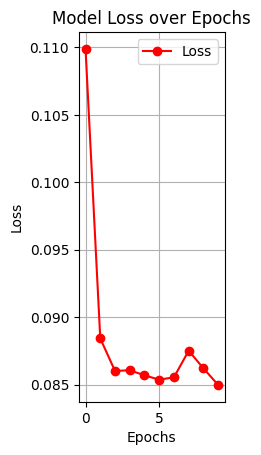

In [ ]:

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], marker='o', color='red', label='Loss')
plt.title("Model Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
if 'accuracy' in history.history:
    plt.subplot(1, 3, 3)
    plt.plot(history.history['accuracy'], marker='o', color='green', label='Accuracy')
    plt.title("Model Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

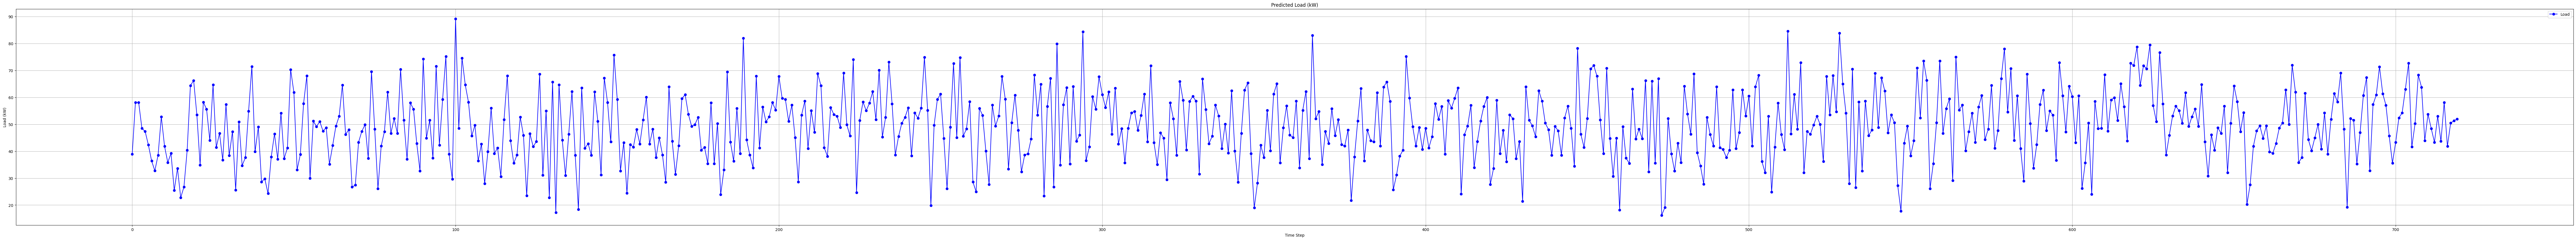

In [ ]:

plt.figure(figsize=(400, 10))

plt.subplot(1, 3, 1)
plt.plot(predicted_load_array, marker='o', color='blue', label='Load')
plt.title("Predicted Load (kW)")
plt.xlabel("Time Step")
plt.ylabel("Load (kW)")
plt.grid(True)
plt.legend()

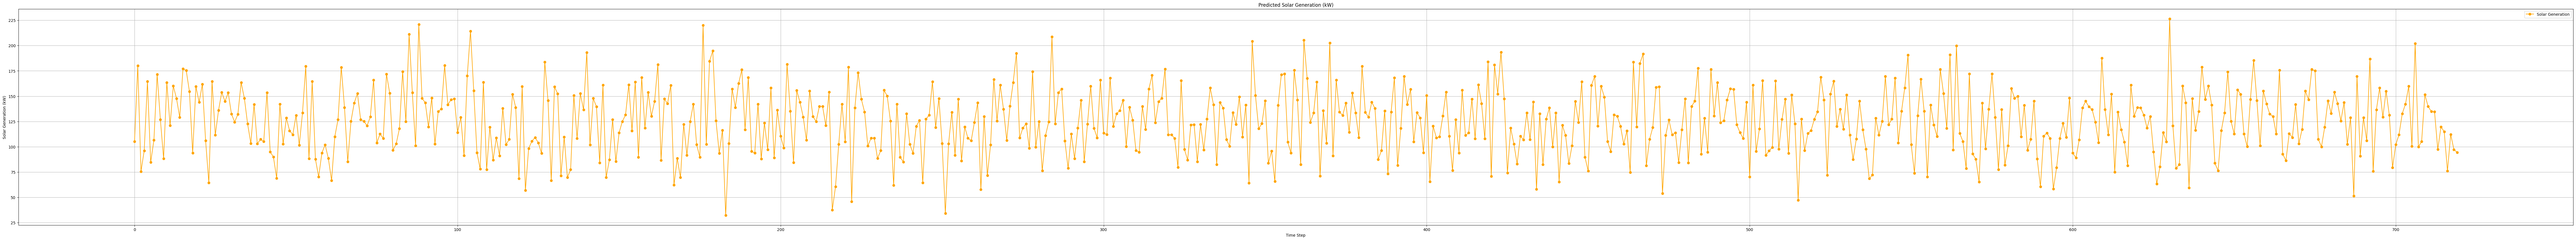

In [ ]:

plt.figure(figsize=(400, 10))
plt.subplot(1, 3, 2)
plt.plot(predicted_solar_array, marker='o', color='orange', label='Solar Generation')
plt.title("Predicted Solar Generation (kW)")
plt.xlabel("Time Step")
plt.ylabel("Solar Generation (kW)")
plt.grid(True)
plt.legend()

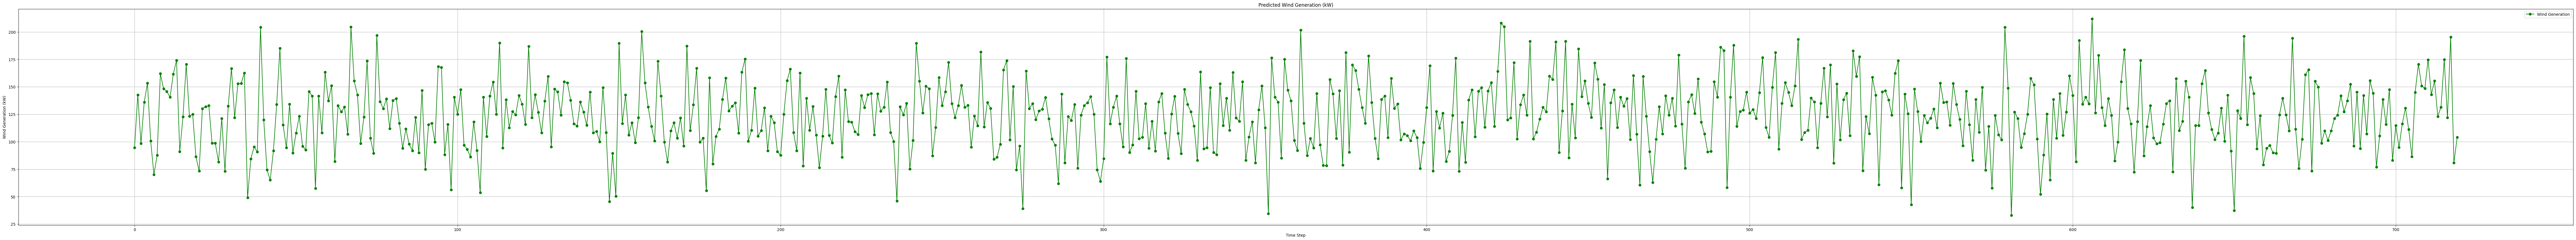

In [ ]:

plt.figure(figsize=(400, 10))
plt.subplot(1, 3, 3)
plt.plot(predicted_wind_array, marker='o', color='green', label='Wind Generation')
plt.title("Predicted Wind Generation (kW)")
plt.xlabel("Time Step")
plt.ylabel("Wind Generation (kW)")
plt.grid(True)
plt.legend()


In [ ]:
results = {
    "Predicted Load (kW)": predicted_load_array,
    "Predicted Solar Generation (kW)": predicted_solar_array,
    "Predicted Wind Generation (kW)": predicted_wind_array,
    "Storage Action": storage_action,
    "Demand Response Action": response_action,
    "Grid Stability Status": anomalies,
}

for key, value in results.items():
    print(f"{key}: {value}")

print(predicted_load_array.shape, predicted_solar_array.shape, predicted_wind_array.shape)

Predicted Load (kW): [38.93731708 58.14156703 58.07950947 48.50633067 47.3618118  42.34447382
 36.3995823  32.73904655 38.53355108 52.81097274 41.87813242 35.8127435
 39.21216056 25.42837284 33.64141359 22.76374927 26.72299774 40.41283057
 64.41646196 66.25023355 53.50762597 34.90673948 58.21453219 55.59555908
 44.03169678 64.68668896 41.43657688 46.66302425 36.71225251 57.33575723
 38.36859058 47.29596433 25.5492847  50.91814691 34.65432347 37.62835916
 54.93233983 71.47654046 39.82205863 48.99951274 28.62375007 29.78794644
 24.3044343  37.91833795 46.46013931 37.09235348 54.16275252 37.27845327
 41.25532629 70.29111502 61.90513957 33.11101316 38.83813575 57.73786734
 68.02183262 29.94542209 51.21260204 49.14167809 51.06242794 47.52098373
 48.7613497  35.222815   42.19786745 49.36597706 52.96739592 64.632091
 46.27109794 48.03588603 26.67722176 27.41195535 43.33217739 47.38064712
 49.85673953 37.36069783 69.53754143 48.17973162 26.10670228 41.92342104
 47.30718977 62.004114   46.63995